In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
pd.options.display.max_columns = 105

In [25]:
player = pd.read_csv('https://raw.githubusercontent.com/Nishant2415/Machine-Learning/master/Dataset/players_20.csv')

In [3]:
player.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [4]:
player.shape

(18278, 104)

In [5]:
player.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,18038.000000,18038.000000,1126.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,20.103892,2021.114591,12.114565,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,16.603639,1.289888,6.735922,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,7.736278,7.244023,7.510709,8.154062,10.634038,8.447876,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,1.000000,2019.000000,1.000000,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,44.000000,42.000000,35.000000,45.000000,12.000000,41.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.630000e+05,9.000000,2020.000000,6.000000,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000,60.000000,58.000000,57.000000,60.750000,29.000000,58.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.

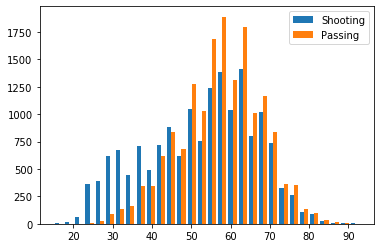

In [8]:
plt.hist([player['shooting'],player['passing']],bins=30,label=['Shooting','Passing'])
plt.legend()
plt.show()

In [23]:
player.corr().head(40)

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
sofifa_id,1.000000,-0.736680,-0.093464,-0.203620,-0.445061,0.042015,-0.159848,-0.228084,-0.360765,-0.092250,-0.079645,-0.143372,0.178376,0.144401,0.103580,0.162112,-0.274248,-0.367527,-0.222207,-0.225230,-0.370582,-0.395903,-0.414772,-0.350622,-0.378179,-0.346197,-0.478916,-0.137097,-0.098612,-0.120116,-0.146427,-0.166148,-0.045166,-0.172646,-0.200029,-0.199998,-0.110933,0.119183,0.117895,-0.032759,-0.439012,0.040989,-0.283919,-0.189141,-0.077519,-0.279780,-0.178362,-0.232305,-0.164695,-0.102409,-0.229932,-0.147125,-0.385061,-0.131479,-0.087414,-0.068464,-0.113073,-0.116270,-0.114658,-0.123064,-0.113487
age,-0.736680,1.000000,0.081391,0.237169,0.464305,-0.262872,0.081513,0.151031,0.259582,0.073988,0.045277,0.065748,-0.225014,-0.122691,-0.119590,-0.201211,0.238990,0.330507,0.161913,0.259990,0.435292,0.429622,0.466477,0.404785,0.418794,0.338096,0.550246,0.128189,0.078531,0.149946,0.135681,0.143063,0.016735,0.141891,0.190419,0.184008,0.088359,-0.153145,-0.144310,-0.023131,0.463331,-0.089609,0.261916,0.185964,0.115859,0.341852,0.161616,0.260420,0.196346,0.086503,0.195372,0.141375,0.370149,0.157007,0.116857,0.101534,0.110313,0.112929,0.112615,0.121381,0.111811
height_cm,-0.093464,0.081391,1.000000,0.768816,0.039945,-0.002432,0.009527,0.019547,0.037935,-0.175200,-0.429980,0.010941,-0.032257,-0.013972,-0.096292,-0.432158,-0.203716,-0.290623,-0.413370,0.216422,0.490354,0.142825,0.152043,0.081560,0.134570,-0.018340,0.151743,-0.498103,-0.376091,0.010296,-0.371445,-0.351059,-0.500107,-0.447578,-0.410071,-0.335343,-0.425013,-0.558354,-0.474736,-0.633770,-0.019698,-0.789806,-0.174280,-0.041149,-0.291791,0.535400,-0.384213,-0.045307,-0.053148,-0.445302,-0.371546,-0.335786,-0.159296,-0.077038,-0.068334,-0.076953,0.367433,0.367163,0.364992,0.367097,0.367375
weight_kg,-0.203620,0.237169,0.768816,1.000000,0.156522,-0.011738,0.051782,0.065946,0.090854,-0.128568,-0.352060,0.048097,-0.081534,-0.027106,-0.092677,-0.387138,-0.095442,-0.182688,-0.300792,0.218564,0.581971,0.254839,0.269460,0.213008,0.244762,0.078373,0.287172,-0.401643,-0.291504,0.039679,-0.291090,-0.260903,-0.415861,-0.349230,-0.310277,-0.259906,-0.340154,-0.493125,-0.420978,-0.545514,0.090986,-0.669125,-0.055855,0.031246,-0.219505,0.614334,-0.279097,0.030643,-0.028345,-0.355329,-0.280242,-0.246309,-0.054167,-0.049683,-0.052770,-0.064492,0.342329,0.343211,0.339805,0.344397,0.343126
overall,-0.445061,0.464305,0.039945,0.156522,1.000000,0.646650,0.638230,0.573578,0.475557,0.230276,0.401261,0.631286,-0.192031,0.154458,-0.103241,0.158866,0.497881,0.683954,0.601190,0.334792,0.517214,0.948912,0.925025,0.790903,0.947823,0.480652,0.944758,0.389078,0.342372,0.345784,0.503157,0.394152,0.370639,0.415521,0.389790,0.487289,0.457052,0.186320,0.199009,0.253464,0.864526,0.103872,0.567504,0.267553,0.370344,0.361543,0.425081,0.399434,0.315582,0.356025,0.509251,0.347950,0.719992,0.303075,0.249891,0.219560,-0.013239,-0.013716,-0.017393,-0.006408,-0.012775
potential,0.042015,-0.262872,-0.002432,-0.011738,0.646650,1.000000,0.580868,0.475490,0.3

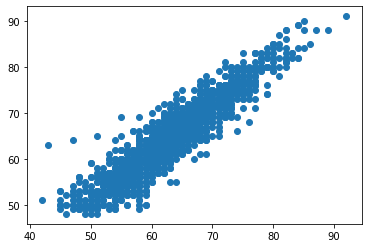

In [24]:
plt.scatter(player['gk_handling'],player['overall'])
plt.show()

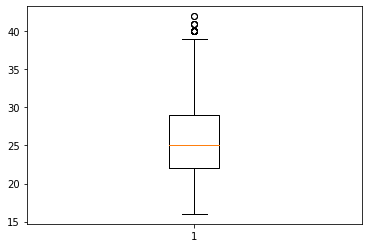

In [26]:
plt.boxplot(player['age'])
plt.show()

In [28]:
pd.crosstab(player['age'],player['overall'])

overall,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94
age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
16,2,1,0,1,2,1,0,0,0,0,0,0,1,0,0,2,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17,8,13,13,16,26,17,17,14,10,14,12,13,11,7,7,10,8,6,2,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18,14,18,28,41,42,46,45,41,40,18,45,41,47,26,35,31,22,15,13,9,6,2,4,3,2,1,2,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19,9,10,18,32,33,42,65,53,65,55,72,64,87,55,60,72,56,29,22,23,21,15,15,8,8,3,8,4,4,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0
20,3,7,16,12,28,33,34,55,79,77,78,80,100,76,86,78,84,63,55,46,31,28,19,16,12,7,7,13,10,3,2,5,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0
21,4,8,7,10,12,23,27,41,42,56,65,78,89,92,102,83,92,92,66,69,52,60,42,24,31,20,22,20,17,11,4,6,1,3,2,2,0,0,0,0,0,0,0,0,0,0,0
22,2,3,11,1,14,16,18,28,43,49,59,60,81,83,94,78,98,95,93,96,74,53,51,27,43,40,24,25,21,19,14,12,9,5,3,1,2,1,0,0,0,0,0,0,0,0,0
23,0,3,3,1,3,5,10,15,18,31,42,39,59,64,81,87,93,130,111,76,68,67,66,47,48,35,30,33,16,20,10,15,8,2,4,10,5,2,1,0,0,0,0,0,0,0,0
24,0,0,2,0,3,5,6,8,27,17,31,38,49,38,62,94,91,87,87,80,74,77,71,58,66,43,27,43,21,24,16,14,14,2,5,5,2,5,2,1,1,0,0,0,0,0,0


In [12]:
kfold = KFold(2, False, 1)

In [13]:
for train, test in kfold.split(player['age']):
    print('train: %s, test: %s' % (train, test))

train: [ 9139  9140  9141 ..., 18275 18276 18277], test: [   0    1    2 ..., 9136 9137 9138]
train: [   0    1    2 ..., 9136 9137 9138], test: [ 9139  9140  9141 ..., 18275 18276 18277]


In [26]:
categorical = player.select_dtypes(['object'])
player_new = player.drop(categorical, axis=1)

In [29]:
player_new.fillna(0, inplace=True)

In [15]:
pca = PCA(n_components = 0.99)
features_pca = pca.fit_transform(player_new)
print('Original features',player_new.shape[1])
print('Reduced features',features_pca.shape[1])

Original features 61
Reduced features 1


In [36]:
lda = LinearDiscriminantAnalysis(n_components = 1)
target = player_new.loc[:,'overall']
features_lda = lda.fit(player_new, np.array(target).ravel()).transform(player_new)
print('Original features',player_new.shape[1])
print('Reduced features',features_lda.shape[1])

Original features 61
Reduced features 1


C:\Users\Nish\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [31]:
inputs = player_new[['passing','dribbling','defending','physic']]
target = player_new['overall']

In [32]:
input_train, input_test, target_train, target_test = train_test_split( inputs, target, test_size = 0.2)
model = GaussianNB()
model.fit(input_train, target_train)

target_predict = model.predict(input_test)
accuracy_score(target_test, target_predict)

0.07357768052516411

In [33]:
knn = KNeighborsClassifier(n_neighbors=7) 
knn.fit(input_train, target_train) 

# Predict on dataset which model has not seen before 
target_predict1 = knn.predict(input_test)
accuracy_score(target_test, target_predict1)

0.18708971553610504